## 1.Import Library

In [1]:
import pandas as pd
import numpy as np

# Data Viz library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.Read Data

In [2]:
Vehicle = pd.read_csv("Vehicletrain.csv", engine = 'python')

#Show first 5 rows
Vehicle.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
Vehicle.head().T

,0,1,2,3,4
id,1,2,3,4,5
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152


## 3. Data Preparation

### Check Missing Value

In [4]:
#Missing Value
Vehicle.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
Vehicle.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
feature00 = Vehicle.drop(columns = ["Vehicle_Age"])
feature00.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,No,27496.0,152.0,39,0


In [7]:
feature00.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
feature00.shape

(381109, 11)

In [9]:
feature00.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
feature01=feature00.drop_duplicates()
feature01.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,No,27496.0,152.0,39,0


In [11]:
feature01.shape

(381109, 11)

In [12]:
feature02 = Vehicle[["id","Gender","Vehicle_Damage"]].drop_duplicates()
feature02.head()

,id,Gender,Vehicle_Damage
0,1,Male,Yes
1,2,Male,No
2,3,Male,Yes
3,4,Male,No
4,5,Female,No


In [13]:
feature02.shape

(381109, 3)

## Get Dummy

In [14]:
feature02Dummy = pd.get_dummies(feature02,columns = ["Gender","Vehicle_Damage"])
feature02Dummy.head()

,id,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,0,1,0,1
1,2,0,1,1,0
2,3,0,1,0,1
3,4,0,1,1,0
4,5,1,0,1,0


## Check Correlation

In [15]:
corr = feature02Dummy.corr()
corr

,id,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes
id,1.000000,-0.000999,0.000999,0.001507,-0.001507
Gender_Female,-0.000999,1.000000,-1.000000,0.091606,-0.091606
Gender_Male,0.000999,-1.000000,1.000000,-0.091606,0.091606
Vehicle_Damage_No,0.001507,0.091606,-0.091606,1.000000,-1.000000
Vehicle_Damage_Yes,-0.001507,-0.091606,0.091606,-1.000000,1.000000


In [16]:
corr[corr > 0.7]

,id,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes
id,1.0,NaN,NaN,NaN,NaN
Gender_Female,NaN,1.0,NaN,NaN,NaN
Gender_Male,NaN,NaN,1.0,NaN,NaN
Vehicle_Damage_No,NaN,NaN,NaN,1.0,NaN
Vehicle_Damage_Yes,NaN,NaN,NaN,NaN,1.0


In [17]:
feature03=feature02Dummy.drop(columns = ["Gender_Female","Vehicle_Damage_No"])
feature03.head()

,id,Gender_Male,Vehicle_Damage_Yes
0,1,1,1
1,2,1,0
2,3,1,1
3,4,1,0
4,5,0,0


In [18]:
feature03.shape

(381109, 3)

In [19]:
feature04 = feature01.merge(feature03,on="id",how="left")
feature04.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
0,1,Male,44,1,28.0,0,Yes,40454.0,26.0,217,1,1,1
1,2,Male,76,1,3.0,0,No,33536.0,26.0,183,0,1,0
2,3,Male,47,1,28.0,0,Yes,38294.0,26.0,27,1,1,1
3,4,Male,21,1,11.0,1,No,28619.0,152.0,203,0,1,0
4,5,Female,29,1,41.0,1,No,27496.0,152.0,39,0,0,0


In [20]:
feature04.shape

(381109, 13)

In [21]:
feature05 = feature04.set_index(feature04.id).drop(columns = ["Gender","Vehicle_Damage"])
feature05.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,,,
1,1,44,1,28.0,0,40454.0,26.0,217,1,1,1
2,2,76,1,3.0,0,33536.0,26.0,183,0,1,0
3,3,47,1,28.0,0,38294.0,26.0,27,1,1,1
4,4,21,1,11.0,1,28619.0,152.0,203,0,1,0
5,5,29,1,41.0,1,27496.0,152.0,39,0,0,0


In [22]:
feature05 = feature05.drop(columns = ["id"])
feature05.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1,1,1
2,76,1,3.0,0,33536.0,26.0,183,0,1,0
3,47,1,28.0,0,38294.0,26.0,27,1,1,1
4,21,1,11.0,1,28619.0,152.0,203,0,1,0
5,29,1,41.0,1,27496.0,152.0,39,0,0,0


In [23]:
feature05.dtypes

Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Gender_Male               uint8
Vehicle_Damage_Yes        uint8
dtype: object

In [24]:
feature05.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Damage_Yes'],
      dtype='object')

In [25]:
feature05.shape

(381109, 10)

In [26]:
feature05.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563,0.540761,0.504877
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936,0.498336,0.499977
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000,0.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000,1.000000,1.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,1.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000


In [27]:
corr1 = feature05.corr()
corr1

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147,0.145545,0.267534
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155,-0.018374,-0.016622
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570,0.000604,0.028235
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170,-0.081932,-0.824143
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575,0.003673,0.009349
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042,-0.111159,-0.224377
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050,-0.002517,-0.002064
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000,0.052440,0.354400
Gender_Male,0.145545,-0.018374,0.000604,-0.081932,0.003673,-0.111159,-0.002517,0.052440,1.000000,0.091606
Vehicle_Damage_Yes,0.267534,-0.016622,0.028235,-0.824143,0.009349,-0.224377,-0.002064,0.354400,0.091606,1.000000


In [28]:
corr1[corr1 > 0.7]

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driving_License,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previously_Insured,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Policy_Sales_Channel,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Vintage,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Gender_Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Vehicle_Damage_Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [29]:
feature05.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1,1,1
2,76,1,3.0,0,33536.0,26.0,183,0,1,0
3,47,1,28.0,0,38294.0,26.0,27,1,1,1
4,21,1,11.0,1,28619.0,152.0,203,0,1,0
5,29,1,41.0,1,27496.0,152.0,39,0,0,0


In [30]:
feature05.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563,0.540761,0.504877
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936,0.498336,0.499977
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000,0.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000,1.000000,1.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,1.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000


## Outlier Detection 1.5 IQR Rule

In [31]:
Q1_Premium = feature05.Annual_Premium.quantile(0.25)
Q3_Premium = feature05.Annual_Premium.quantile(0.75)
IQR = Q3_Premium - Q1_Premium

Lower = Q1_Premium - 1.5*IQR
Upper = Q3_Premium + 1.5*IQR

print (Q1_Premium, Q3_Premium, IQR, Lower, Upper)

24405.0 39400.0 14995.0 1912.5 61892.5


In [32]:
#ดังนั้นช่วงที่เป็น Outlier ของ Annual_Premium คือ Annual_Premium <1912.5 และ >61892.5
# Annual_Premium ให้อยู่ในช่วงข้อมูลส่วนใหญ่ โดยตัด outlier ออก

feature06=feature05[(feature05.Annual_Premium>Lower)&(feature05.Annual_Premium<Upper)]
feature06.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1,1,1
2,76,1,3.0,0,33536.0,26.0,183,0,1,0
3,47,1,28.0,0,38294.0,26.0,27,1,1,1
4,21,1,11.0,1,28619.0,152.0,203,0,1,0
5,29,1,41.0,1,27496.0,152.0,39,0,0,0


In [33]:
feature06.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
count,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000,370789.000000
mean,38.670344,0.997942,26.437281,0.459666,29264.643973,112.542923,154.345442,0.121781,0.540251,0.503146
std,15.440166,0.045316,13.310391,0.498371,14743.056656,54.039616,83.670478,0.327033,0.498378,0.499991
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24102.000000,30.000000,82.000000,0.000000,0.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31319.000000,151.000000,154.000000,0.000000,1.000000,1.000000
75%,49.000000,1.000000,36.000000,1.000000,38596.000000,152.000000,227.000000,0.000000,1.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,61892.000000,163.000000,299.000000,1.000000,1.000000,1.000000


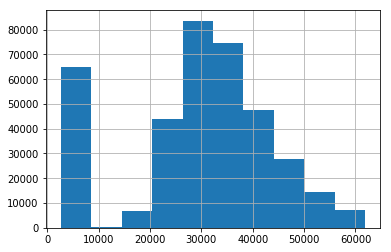

In [34]:
feature06.Annual_Premium.hist()

In [35]:
feature06.shape

(370789, 10)

In [36]:
feature06.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Damage_Yes'],
      dtype='object')

In [37]:
feature07 = feature06.drop(columns = ["Response"])
feature07.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1,1
2,76,1,3.0,0,33536.0,26.0,183,1,0
3,47,1,28.0,0,38294.0,26.0,27,1,1
4,21,1,11.0,1,28619.0,152.0,203,1,0
5,29,1,41.0,1,27496.0,152.0,39,0,0


In [38]:
feature07.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Male',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [39]:
feature07.shape

(370789, 9)

In [40]:
y = feature06['Response']

In [41]:
y.shape

(370789,)

In [42]:
y.value_counts()


0    325634
1     45155
Name: Response, dtype: int64

In [43]:
y.head()

id
1    1
2    0
3    1
4    0
5    0
Name: Response, dtype: int64

## Feature Transformation (Take Log to Normal Distribution)

In [44]:
feature07.dtypes

Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Gender_Male               uint8
Vehicle_Damage_Yes        uint8
dtype: object

In [45]:
Dummy_col = ["Gender_Male", "Vehicle_Damage_Yes"]

In [46]:
import numpy as np
feature08 = np.log(feature07[ [i for i in feature07.columns if i not in Dummy_col]]+ 0.01)
feature08.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,
1,3.784417,0.00995,3.332562,-4.60517,10.607921,3.258481,5.379943
2,4.330865,0.00995,1.101940,-4.60517,10.420375,3.258481,5.209541
3,3.850360,0.00995,3.332562,-4.60517,10.553049,3.258481,3.296207
4,3.044999,0.00995,2.398804,0.00995,10.261826,5.023946,5.313255
5,3.367641,0.00995,3.713816,0.00995,10.221796,5.023946,3.663818


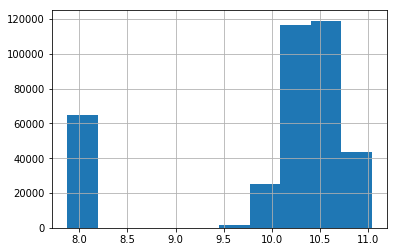

In [47]:
feature08.Annual_Premium.hist()

In [48]:
feature08.shape

(370789, 7)

In [49]:
feature09 = feature08.merge(feature07[Dummy_col], on = "id", how = "left")
feature09.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,
1,3.784417,0.00995,3.332562,-4.60517,10.607921,3.258481,5.379943,1,1
2,4.330865,0.00995,1.101940,-4.60517,10.420375,3.258481,5.209541,1,0
3,3.850360,0.00995,3.332562,-4.60517,10.553049,3.258481,3.296207,1,1
4,3.044999,0.00995,2.398804,0.00995,10.261826,5.023946,5.313255,1,0
5,3.367641,0.00995,3.713816,0.00995,10.221796,5.023946,3.663818,0,0


In [50]:
feature09.shape

(370789, 9)

## Normalization

In [51]:
from sklearn.preprocessing import normalize
feature10 = pd.DataFrame(normalize(feature09, norm = "l2", axis=1), columns = feature09.columns, index = feature09.index)
feature10.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes
id,,,,,,,,,
1,0.267115,0.000702,0.235222,-0.325046,0.748738,0.229993,0.379732,0.070583,0.070583
2,0.315425,0.000725,0.080256,-0.335403,0.758936,0.237321,0.379421,0.072832,0.000000
3,0.285417,0.000738,0.247034,-0.341369,0.782269,0.241542,0.244339,0.074127,0.074127
4,0.230310,0.000753,0.181435,0.000753,0.776160,0.379989,0.401871,0.075636,0.000000
5,0.259601,0.000767,0.286287,0.000767,0.787967,0.387281,0.282432,0.000000,0.000000


In [52]:
feature10.shape

(370789, 9)

In [53]:
X = feature10

In [54]:
y.shape

(370789,)

In [55]:
y.value_counts()

0    325634
1     45155
Name: Response, dtype: int64

## แก้ปัญหา Imbalance

In [56]:
from imblearn.over_sampling import SMOTE

C:\Python Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Python Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Python Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The

In [57]:
# random_state คือ ชุดเลขสุ่ม หากต้องการผลเหมือนกัน ให้ระบุ 101 
# การกำหนด ratio = 1.0 คือให้ สุ่มเพิ่มจำนวนในแต่ละคลาสให้เท่ากัน

SM = SMOTE(random_state=101,sampling_strategy='auto')

X_res, y_res = SM.fit_sample(X, y)

C:\Python Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [58]:
# แสดงจำนวนก่อนสุ่ม OverSampling

print("Before OverSampling, counts '0': {}".format(sum(y== 0)))
print("Before OverSampling, counts '1': {}".format(sum(y== 1)))

Before OverSampling, counts '0': 325634
Before OverSampling, counts '1': 45155


In [59]:
# แสดงจำนวนหลังสุ่ม OverSampling

print("After OverSampling, counts '0': {}".format(sum(y_res == 0)))
print("After OverSampling, counts '1': {}".format(sum(y_res == 1)))


After OverSampling, counts '0': 325634
After OverSampling, counts '1': 325634


In [60]:
X_res.shape

(651268, 9)

In [61]:
y_res.shape

(651268,)

## Model

### Train-Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=101,stratify = y_res)
print (X_train.shape, X_test.shape)

(521014, 9) (130254, 9)


In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logisM = LogisticRegression()

In [65]:
logisM.fit(X_train, y_train)

C:\Python Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# ทำนายค่าในชุด test set ที่แบ่งไว้ 20%
y_pred = logisM.predict(X_test)

In [67]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [68]:
from sklearn.metrics import classification_report

In [69]:
# สั่งพิมพ์รายงาน ค่าการวัดผล และประสิทธิภาพการทำนายของตัวแบบ

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74     65127
           1       0.71      0.97      0.82     65127

    accuracy                           0.78    130254
   macro avg       0.83      0.78      0.78    130254
weighted avg       0.83      0.78      0.78    130254



In [70]:
#baseline performance of model without tuning
from sklearn.metrics import f1_score
y_pred= logisM.predict(X_test)
f1_score(y_test, y_pred)

0.8185952632021583

In [71]:
Prediction = pd.DataFrame(y_pred, columns = ["Prediction"])
Prediction.head()

,Prediction
0,1
1,1
2,1
3,0
4,1


In [72]:
YTest = pd.DataFrame(y_test, columns = ["YTEST"])
YTest.head()

,YTEST
0,1
1,1
2,1
3,0
4,0


In [73]:
result = pd.concat([YTest,Prediction], axis = 1)
result.head()

,YTEST,Prediction
0,1,1
1,1,1
2,1,1
3,0,0
4,0,1


## Hyper Parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [1,5,10],
}

# Create a based model
logisM = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV( estimator = logisM,param_grid = param_grid, verbose = 3)

In [75]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, score=0.783, total=   4.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ................................. C=1, score=0.784, total=   3.6s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


[CV] ................................. C=1, score=0.785, total=   3.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.784, total=   4.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.786, total=   4.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.783, total=   2.8s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.784, total=   4.2s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.785, total=   2.9s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.784, total=   2.2s
[CV] C=5 .............................................................
[CV] .

C:\Python Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ C=10, score=0.784, total=   4.5s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.785, total=   2.7s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.784, total=   2.7s
[CV] C=10 ............................................................
[CV] ................................ C=10, score=0.786, total=   4.6s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   53.8s finished
C:\Python Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [76]:
# ดู default parameter

grid_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## grid search แล้วได้ parameter เหมือนเดิม ทำให้ performance model เท่าเดิม ค่อยหาML ตัวอื่นมาทำ Model

## Save & Load Model

In [77]:
result.to_csv("VehiclePrediction.csv")

In [78]:
import pickle
# Dump Model
file = open("model_dumped.pkl", "wb")
pickle.dump(logisM, file)

In [79]:
# Loaded Model
file = open("model_dumped.pkl", "rb")
model_loaded = pickle.load(file)

In [80]:
model_loaded.fit(X_train, y_train)

C:\Python Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
#Using loaded model to predict
model_loaded.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [82]:
y_pred2=model_loaded.predict(X_test)

In [83]:
Prediction2 = pd.DataFrame(y_pred2, columns = ["Prediction2"])
Prediction2.head()

,Prediction2
0,1
1,1
2,1
3,0
4,1


In [84]:
Prediction2.shape

(130254, 1)